## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format','{:.2f}'.format)

In [96]:
movie_df=pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

In [97]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [98]:
def welcome (df):
    '''Функция получения первичной информации о датафрейме'''
    print ('------------- Первые 5 строк ------------')
    display(df.head())
    print('')
    print('')
    print ('------------- Типы данных ------------')
    print (df.info())
    print('')
    print('')
    print ('------------- Пропуски ------------')
    count = 0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count = +1
        if count == 0:
            print('Пропусков НЕТ')
    print('')
    print('')
    display(pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm'))

In [99]:
welcome(movie_df)

------------- Первые 5 строк ------------


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"




------------- Типы данных ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB
None


------------- Пропуски ------------
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
Пропусков НЕТ
film_stud

,0
title,0
puNumber,0
show_start_date,0
type,0
film_studio,0
production_country,0
director,0
producer,8
age_restriction,0
refundable_support,96


In [100]:
show_df=pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [101]:
welcome(show_df)

------------- Первые 5 строк ------------


,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79




------------- Типы данных ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None


------------- Пропуски ------------
Пропусков НЕТ
Пропусков НЕТ




,0
puNumber,0
box_office,0


In [102]:
show_df['puNumber']=show_df['puNumber'].astype('str')

In [103]:
total_df=movie_df.merge(show_df,how="left",on='puNumber')

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [104]:
welcome(total_df)

------------- Первые 5 строк ------------


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan




------------- Типы данных ------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), object(12)
memory usage: 994.2+ KB
None


------------- Пропуски ------------
Пропусков НЕТ
Проп

,0
title,0
puNumber,0
show_start_date,0
type,0
film_studio,0
production_country,0
director,0
producer,8
age_restriction,0
refundable_support,96


In [105]:
total_df['show_start_date']=pd.to_datetime(total_df['show_start_date'],format='%Y-%m-%d',errors='ignore').dt.date

In [106]:
total_df['show_start_date']=pd.to_datetime(total_df['show_start_date'])

In [107]:
total_df['ratings']=pd.to_numeric(total_df['ratings'],errors='coerce')

In [108]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(5), object(10)
memory usage: 994.2+ KB


Преобразовал данные в столбцах **show_start_date** и **ratings** для дальнейшего сравнения стобцов

Остальные данные будут преобразованы по мере необходимости.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [109]:
total_df['director']=total_df['director'].fillna('Неизвестен')

In [110]:
total_df['genres']=total_df['genres'].fillna('неизвестный жанр')

Заполнили пропуски в столбцах **director** значением - *Неизвестен* и столбец **genres** - *неизвестный жанр* для дальнейшей работы со столбцами(Создания двух столбцов: с именем и фамилией главного режиссёра и основным жанром фильма)

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [111]:
for i in total_df.keys():
    print(i,total_df[i].duplicated().sum())


title 714
puNumber 2
show_start_date 5521
type 7478
film_studio 1995
production_country 6535
director 2674
producer 2136
age_restriction 7481
refundable_support 7451
nonrefundable_support 7410
budget 7195
financing_source 7482
ratings 7405
genres 6743
box_office 4547


Дубликаты могли появться, засчет множественного проката одних и тех же фильмов

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [112]:
total_df['type'] = total_df['type'].str.strip()

In [113]:
total_df['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [114]:
total_df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [115]:
total_df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'неизвестный жанр', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
    

Во всех категориальных столбцах наблюдаются лишние пробелы (в частности в столбце **type** убрали пробелы), разные способы разделения (запятые, тире) все это приводит к хаосу в данных , мешает категоризации и  усложняет работу с ними.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [116]:
total_df.loc[total_df['budget']==0,'budget']=total_df['nonrefundable_support']+total_df['refundable_support']

In [117]:
gos_bd=total_df.groupby('title')[['refundable_support','nonrefundable_support','budget']].mean()
gos_bd=gos_bd.loc[(gos_bd['refundable_support']>0)|(gos_bd['nonrefundable_support']>0)|(gos_bd['budget']>0)]
gos_bd

,refundable_support,nonrefundable_support,budget
title,,,
(Не)идеальный мужчина,40000000.00,60000000.00,150147502.00
12 месяцев. Новая сказка,15000000.00,5000000.00,90120000.00
14+,0.00,23000000.00,23000000.00
28 Панфиловцев,0.00,30000000.00,85384000.00
30 свиданий,5000000.00,20000000.00,48661150.00
...,...,...,...
Я свободен,0.00,30000000.00,46154000.00
Я умею вязать,0.00,4700000.00,14462464.00
Я худею,0.00,30000000.00,87649127.00


Обнаружил пустые значения в столбце **budget** несмотря на наличие гос поддержки. Заполнили значения суммой датаций.

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [118]:
total_df['year_date']=pd.DatetimeIndex(total_df['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [119]:
def upp(var):
    z=var.split(',')[0]
    return z

In [120]:
total_df['main_director']=total_df['director'].apply(upp)

In [121]:
total_df['main_genre']=total_df['genres'].apply(upp)

In [122]:
total_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_date,main_director,main_genre
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [123]:
total_df['cut_budget']=(total_df['refundable_support']+total_df['nonrefundable_support'])*100/total_df['budget']

In [124]:
total_df['cut_budget']=total_df['cut_budget'].round()

In [125]:
total_df['cut_budget'].value_counts()

65.00    26
66.00    25
70.00    22
62.00    18
67.00    17
         ..
13.00     1
58.00     1
4.00      1
7.00      1
78.00     1
Name: cut_budget, Length: 62, dtype: int64

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [126]:
pu_date=total_df.groupby(['year_date'])['puNumber'].count()

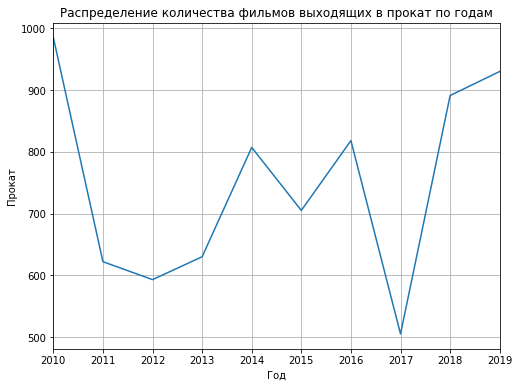

In [127]:
pu_date.plot(grid=True,kind='line',figsize=(8,6))
plt.title('Распределение количества фильмов выходящих в прокат по годам')
plt.xlabel('Год')
plt.ylabel('Прокат');

In [128]:
pu_date

year_date
2010    985
2011    622
2012    593
2013    630
2014    807
2015    705
2016    818
2017    505
2018    891
2019    930
Name: puNumber, dtype: int64

In [129]:
box_date=total_df.groupby(['year_date'])['box_office'].count()

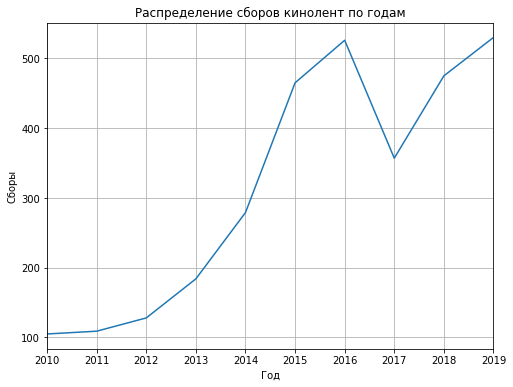

In [130]:
box_date.plot(grid=True,kind='line',figsize=(8,6))
plt.title('Распределение сборов кинолент по годам')
plt.xlabel('Год')
plt.ylabel('Сборы');

In [131]:
box_date

year_date
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

In [132]:
part=total_df['box_office'].count()*100/total_df['puNumber'].count()

In [133]:
part.round().mean()

42.0

In [134]:
ppp=pu_date.to_frame()


In [135]:
ooo=box_date.to_frame()

In [136]:
j=ppp.join(ooo,how='outer')

In [137]:
j['percent']=j['box_office']*100/j['puNumber']

In [138]:
j

,puNumber,box_office,percent
year_date,,,
2010,985,105,10.66
2011,622,109,17.52
2012,593,128,21.59
2013,630,184,29.21
2014,807,279,34.57
2015,705,465,65.96
2016,818,526,64.30
2017,505,357,70.69
2018,891,475,53.31


Примерно у 42 процентов картин имеется полная информация о прокате

In [139]:
# Код ревьюера

(total_df[['year_date','box_office']].groupby('year_date').apply(lambda x : x['box_office'].apply(pd.notna).mean()) * 100).to_frame()

,0
year_date,
2010,10.66
2011,17.52
2012,21.59
2013,29.21
2014,34.57
2015,65.96
2016,64.30
2017,70.69
2018,53.31


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [140]:
box_date.agg(['min','max'])

min    105
max    530
Name: box_office, dtype: int64

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [141]:
piv=pd.pivot_table(total_df,columns='year_date',values='box_office',aggfunc=(['mean','median']))
piv

mean                                                       \
year_date      2010      2011     2012      2013        2014        2015   
box_office 23130.04 129383.17 54339.24 161954.92 26684415.27 84940570.31   

                                                              median          \
year_date         2016         2017         2018        2019    2010    2011   
box_office 91000569.85 136032793.33 104565059.23 91369261.85 1700.00 3000.00   

                                                                      \
year_date     2012    2013     2014       2015       2016       2017   
box_office 5660.00 3522.50 18160.00 4920933.00 3846679.41 9968340.00   

                                  
year_date        2018       2019  
box_office 8891102.21 4627798.34

В 2017 и 2018 годах сборы были максимально высокими

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [142]:
piv=total_df.loc[total_df['year_date']>=2015].pivot_table(index='age_restriction',columns='year_date',values='box_office',aggfunc='sum')


In [143]:
piv

year_date,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,379054578.37,150228848.67,229598930.00,32449002.11,17746066.82
«12+» - для детей старше 12 лет,13616082008.91,12204446524.39,7851427660.67,14267291660.69,12680198773.67
«16+» - для детей старше 16 лет,11368120870.27,16664548541.74,18745042900.06,16503602346.96,12753418984.60
«18+» - запрещено для детей,5432308367.44,6793929818.87,9651495581.02,8760085501.15,10121796303.64
«6+» - для детей старше 6 лет,8701799371.41,12053146008.24,12086142145.76,10104974623.41,12852548650.86


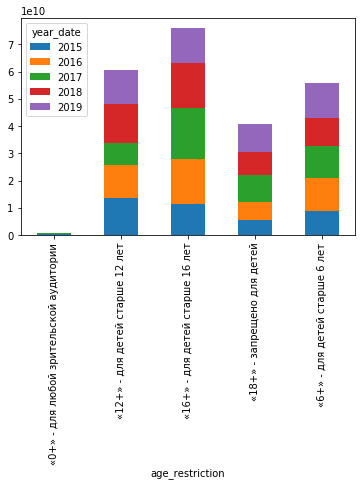

In [144]:
piv.plot(kind='bar',stacked=True);

In [145]:
piv.min()

year_date
2015   379054578.37
2016   150228848.67
2017   229598930.00
2018    32449002.11
2019    17746066.82
dtype: float64

In [146]:
piv.max()

year_date
2015   13616082008.91
2016   16664548541.74
2017   18745042900.06
2018   16503602346.96
2019   12852548650.86
dtype: float64

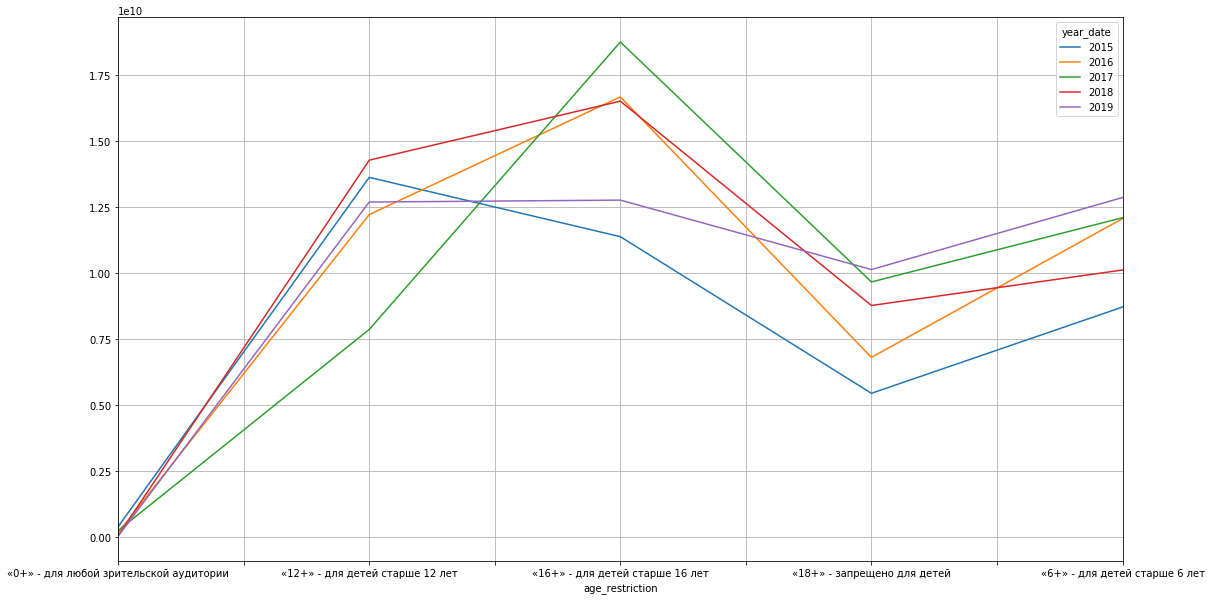

In [147]:
piv.plot(figsize=(18,10),grid=True);

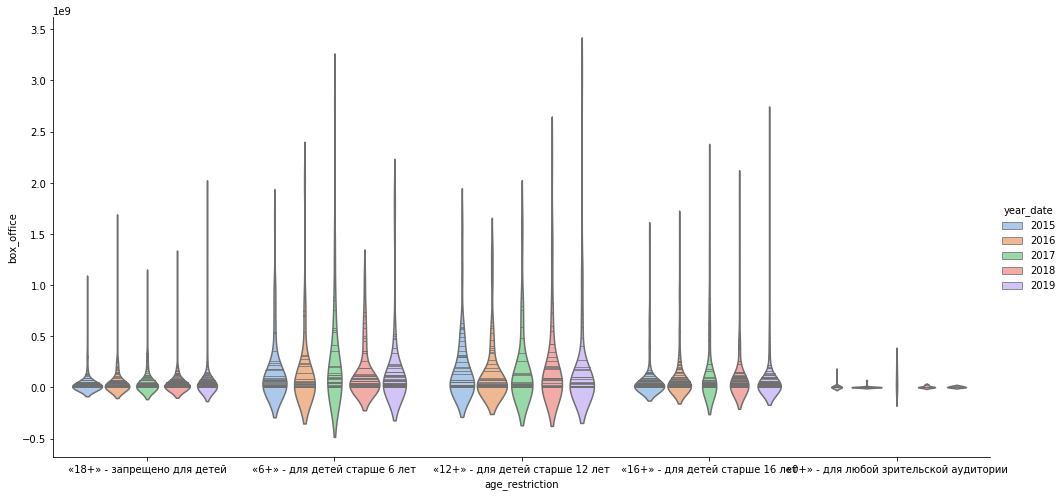

In [148]:
sns.catplot(
    x='age_restriction', 
    y='box_office', 
    data=total_df, 
    kind='violin', 
    hue='year_date', 
    hue_order=[2015,2016,2017,2018,2019], 
    split=False,
    inner="stick", 
    palette="pastel",
    height=7, 
    aspect=2); 



В среднем фильмы для детей страше 16 лет сборы были больше. В 2015 году самые большие сборы приносили фильмы для детей 12+ лет. Изменение сборов может быть вызвано взрослением аудитории активно посещающей кинотеатры

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [149]:
bud=total_df['budget'].sum()

In [150]:
bud

43632235404.0

In [151]:
supp=total_df['refundable_support']+total_df['nonrefundable_support']

In [152]:
supp.sum()

20200688312.0

In [153]:
t=supp / bud *100

In [154]:
t.sum()

46.29762405010332

In [155]:
piv_b=total_df.loc[total_df['budget']>0].pivot_table(columns='ratings',values=(['budget','box_office']),aggfunc='sum')


In [156]:

piv_b

ratings,1.00,2.50,2.80,2.90,3.00,3.10,3.20,3.30,3.50,3.80,...,7.40,7.50,7.60,7.70,7.80,7.90,8.00,8.10,8.20,8.50
box_office,7323648.00,70798668.90,38334497.27,348628257.00,262040254.00,37266709.89,85217234.30,11034433.20,30325879.15,32244810.00,...,832896414.50,4478663081.52,1477185479.21,540037269.23,200288556.40,185619740.34,410058.00,365353.60,408646665.70,477744971.70
budget,36016269.00,154245687.00,62044646.00,287513841.00,323232109.00,47328000.00,551033852.00,73379554.00,385000000.00,90120000.00,...,857960414.00,1676535799.00,905308867.00,1172699860.00,394937470.00,406360666.00,96170000.00,79411900.00,240041307.00,540588394.00


In [157]:
pd.pivot_table(total_df,index='type',columns='main_director',values=(['budget','box_office']))

box_office                                       \
main_director                 Р.Асхаев    Т.Саакян Ёлкин Туйчиев  Ён Сан-хо   
type                                                                          
Анимационный                       nan         nan           nan        nan   
Документальный                     nan         nan           nan        nan   
Музыкально-развлекательный         nan         nan           nan        nan   
Научно-популярный                  nan         nan           nan        nan   
Прочие                             nan         nan           nan        nan   
Художественный             24605374.10 11700861.81      58733.50 8459304.83   

                                                                            \
main_director              А Андрющенко А. Калюжный А. Кутерье   А.Аббасов   
type                                                                         
Анимационный                        nan         nan 3094683.00         nan   
Документальный                      nan         nan        nan         nan   
Музыкально-развлекательный          nan         nan        nan         nan   
Научно-популярный                   nan   802765.00        nan         nan   
Прочие                              nan         nan        nan         nan   
Художественный             137326373.00         nan        nan 32721103.43   

                                                    ...      budget  \
main_director              А.Агаджанян А.Аксененко  ...  Ю.Белюсева   
type                                                ...               
Анимационный                       nan         nan  ...         nan   
Документальный                     nan         nan  ...         nan   
Музыкально-развлекательный         nan         nan  ...         nan   
Научно-популярный                  nan         nan  ...         nan   
Прочие                             nan         nan  ...         nan   
Художественный               350517.00 30624532.09  ... 38461538.00   

                                                                             \
main_director                  Ю.Быков   Ю.Васильев    Ю.Грымов      Ю.Кара   
type                                                                          
Анимационный                       nan          nan         nan         nan   
Документальный                     nan          nan         nan         nan   
Музыкально-развлекательный         nan          nan         nan         nan   
Научно-популярный                  nan          nan         nan         nan   
Прочие                             nan          nan         nan         nan   
Художественный             55000000.00 222177790.00 37878787.00 40000000.00   

                                                                             \
main_director                 Ю.Кулаков   Ю.Попович   Ю.Разыков    Ю.Фетинг   
type                                                                          
Анимационный               126932894.00         nan         nan         nan   
Документальный                      nan         nan         nan         nan   
Музыкально-развлекательный          nan         nan         nan         nan   
Научно-популярный                   nan         nan         nan         nan   
Прочие                              nan         nan         nan         nan   
Художественный                      nan 52860000.00 61571449.00 49280496.00   

                                        
main_director                Я.Поляруш  
type                                    
Анимационный                       nan  
Документальный                     nan  
Музыкально-развлекательный         nan  
Научно-популярный                  nan  
Прочие                             nan  
Художественный             80000000.00  

[6 rows x 2678 columns]

In [158]:

dir=total_df.groupby(['main_director'])['budget','box_office'].sum()

In [159]:
dir=dir.loc[(dir['budget']>0)|(dir['box_office']>0)]

In [160]:
dir.max()

budget       2305074303.00
box_office   4207964001.35
dtype: float64

In [161]:
dir.loc[dir['budget']==2305074303]

,budget,box_office
main_director,,
О.Степченко,2305074303.00,333707838.59


In [162]:
dir.loc[dir['box_office']==4207964001.35]

,budget,box_office
main_director,,
К.Шипенко,704930668.00,4207964001.35


In [163]:
typ=total_df.groupby(['type'])['budget','box_office'].agg(['sum','count'])

In [164]:
typ

budget            box_office      
                                      sum count             sum count
type                                                                 
Анимационный                5909423882.00    31  43193935737.72   437
Документальный                33000000.00     1     66266378.30    40
Музыкально-развлекательный           0.00     0      1416635.00     1
Научно-популярный                    0.00     0     25657603.50     9
Прочие                               0.00     0    303229676.45   155
Художественный             37689811522.00   300 197929216446.16  2516

### Шаг 5. Напишите общий вывод

Исследование показывает, что наличие гос поддержки не оказывает особого влияния на рейтинг фильма, кроме того сборы фильмов оказывались побольшей части меньше бюджеты фильмов. Общая сумма государственной поддержки составила 20200688312 рублей , что составило 46 процентов от общего бюджета картин. Большая часть картин в прокате - художественные фильмы.